In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
# importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import keras
from keras.initializers import glorot_uniform
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, GlobalAveragePooling2D ,AveragePooling2D

from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import backend as K
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from keras import regularizers
from keras.regularizers import l2, l1
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, save_img
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
#from keras.layers import Input, Dense, Activation, BatchNormalization, Conv2D, MaxPooling2D, , Add, ZeroPadding2D,Flatten

plt.style.use('fivethirtyeight')


In [2]:
train_data_path = '../../data/aug_red_eye/training_aug/train'
val_data_path = '../../data/aug_red_eye/training_aug/val'
test_data_path = '../../data/aug_red_eye/training_aug/test'

In [3]:
# image parameters:

WIDTH = 128
HEIGHT = 128
CHANNELS = 3
CLASSES = 2

In [4]:
batchsize = 32
train_datagen = ImageDataGenerator(
        preprocessing_function= preprocess_input,
        rotation_range=30,
        horizontal_flip=True,
        vertical_flip=True,
        rescale=1./255,
        fill_mode="nearest")
val_datagen = ImageDataGenerator(preprocessing_function= preprocess_input,
                                rescale=1./255)
test_datagen = ImageDataGenerator(preprocessing_function= preprocess_input,
                                rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_data_path,
        color_mode="rgb",
        target_size=(WIDTH, HEIGHT),
        batch_size=batchsize,
        class_mode="categorical",
        subset='training',
        shuffle=True,
        seed=42
        )
validation_generator = val_datagen.flow_from_directory(
        val_data_path,
        color_mode="rgb",
        target_size=(WIDTH, HEIGHT),
        batch_size=batchsize,
        class_mode="categorical",
        subset='training',
        shuffle=True,
        seed=42
        )

test_generator = test_datagen.flow_from_directory(
        test_data_path,
        color_mode="rgb",
        target_size=(WIDTH, HEIGHT),
        batch_size=11,
        shuffle = False,
        class_mode='categorical',
        seed = 42)

Found 949 images belonging to 2 classes.
Found 169 images belonging to 2 classes.
Found 11 images belonging to 2 classes.


In [5]:
# x, y = train_generator.next()
# x.shape

In [6]:
resnet50_model = Sequential()

pretrain_model_resnet50 = tf.keras.applications.ResNet50(include_top=False,
                                                        input_shape = (WIDTH,HEIGHT,CHANNELS),
                                                        pooling = 'max',
                                                        classes = 2,
                                                        weights = 'imagenet')

for layer in pretrain_model_resnet50.layers:
    layer.trainable = False

resnet50_model.add(pretrain_model_resnet50)
resnet50_model.add(Flatten())

resnet50_model.add(Dense(256, activation = 'relu'))
resnet50_model.add(Dense(128, activation = 'relu'))
resnet50_model.add(Dense(64, activation = 'relu'))
#resnet50_model.add(Dropout(0.2))
resnet50_model.add(Dense(CLASSES, activation='sigmoid'))



In [7]:
resnet50_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 24,153,538
Trainable params: 565,826
Non-t

In [8]:
# compling the model
resnet50_model.compile(optimizer=keras.optimizers.Adam(1e-4), 
                loss=keras.losses.binary_crossentropy, metrics=['accuracy','Recall','Precision'])

# setting the callback function
cb = [
    tf.keras.callbacks.CSVLogger('data.csv'),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=1001, restore_best_weights=False)]

In [9]:
history = resnet50_model.fit(train_generator,
        batch_size = batchsize, 
        epochs = 5,
        verbose = 2, 
        validation_data = validation_generator,
        callbacks=[cb],
        shuffle = True)

Epoch 1/5
30/30 - 16s - loss: 0.6868 - accuracy: 0.5627 - recall: 0.5595 - precision: 0.5457 - val_loss: 0.6860 - val_accuracy: 0.5621 - val_recall: 0.5444 - val_precision: 0.5476 - 16s/epoch - 521ms/step
Epoch 2/5
30/30 - 4s - loss: 0.6779 - accuracy: 0.5616 - recall: 0.5627 - precision: 0.5699 - val_loss: 0.6787 - val_accuracy: 0.4911 - val_recall: 0.4615 - val_precision: 0.5417 - 4s/epoch - 150ms/step
Epoch 3/5
30/30 - 5s - loss: 0.6684 - accuracy: 0.6101 - recall: 0.6080 - precision: 0.6191 - val_loss: 0.6725 - val_accuracy: 0.5680 - val_recall: 0.5917 - val_precision: 0.5525 - 5s/epoch - 151ms/step
Epoch 4/5
30/30 - 4s - loss: 0.6589 - accuracy: 0.6523 - recall: 0.6544 - precision: 0.6469 - val_loss: 0.6651 - val_accuracy: 0.6272 - val_recall: 0.6331 - val_precision: 0.6114 - 4s/epoch - 149ms/step
Epoch 5/5
30/30 - 5s - loss: 0.6514 - accuracy: 0.6407 - recall: 0.6459 - precision: 0.6399 - val_loss: 0.6794 - val_accuracy: 0.5444 - val_recall: 0.5503 - val_precision: 0.5471 - 5s/ep

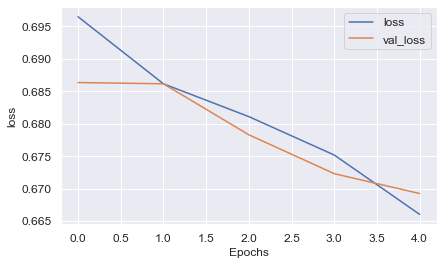

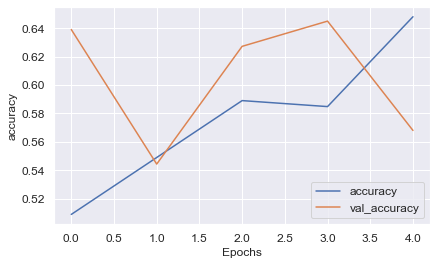

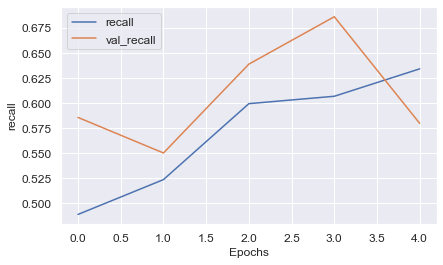

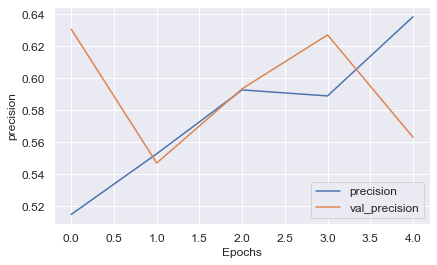

In [10]:
df = pd.read_csv('data.csv')


def metricplot(df, xlab, ylab_1,ylab_2):
    
    """
    This function plots metric curves and saves it
    to respective folder
    inputs: df : pandas dataframe 
            xlab: x-axis
            ylab_1 : yaxis_1
            ylab_2 : yaxis_2
            path: full path for saving the plot
            """
    plt.figure()
    sns.set_theme(style="darkgrid")
    sns.lineplot(x = df[xlab], y = df[ylab_1])
    sns.lineplot(x = df[xlab], y = df[ylab_2])
    plt.xlabel('Epochs',fontsize = 12)
    plt.ylabel(ylab_1,fontsize = 12)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.legend([ylab_1,ylab_2], prop={"size":12})
    #plt.savefig(path+'/'+ ylab_1)
    plt.show()

metricplot(df, 'epoch', 'loss','val_loss')
metricplot(df, 'epoch', 'accuracy','val_accuracy')
metricplot(df, 'epoch', 'recall','val_recall')
metricplot(df, 'epoch', 'precision','val_precision')

In [10]:
print('Model Evalution Score on Validation set')
print(resnet50_model.evaluate(validation_generator))

Model Evalution Score on Validation set
6/6 [==============================] - 1s 42ms/step - loss: 0.6794 - accuracy: 0.5444 - recall: 0.5503 - precision: 0.5471
[0.6794133186340332, 0.5443786978721619, 0.5502958297729492, 0.5470588207244873]


In [11]:
print('Model Evalution Score')
print(resnet50_model.evaluate(test_generator))

Model Evalution Score
1/1 [==============================] - 0s 327ms/step - loss: 0.6357 - accuracy: 0.6364 - recall: 0.6364 - precision: 0.7000
[0.6357179284095764, 0.6363636255264282, 0.6363636255264282, 0.699999988079071]


In [13]:
resnet50_model.save(r"modelResNet50_TL.h5")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


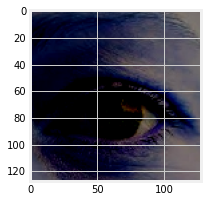

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


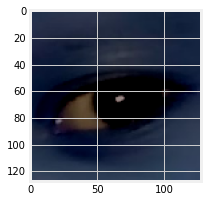

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


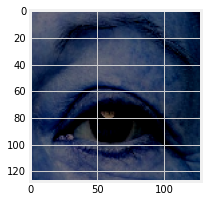

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


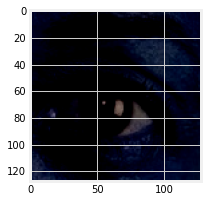

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


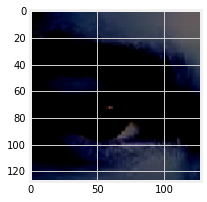

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


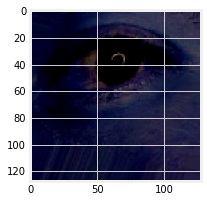

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


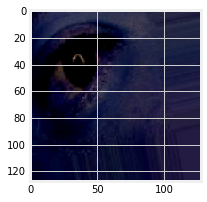

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


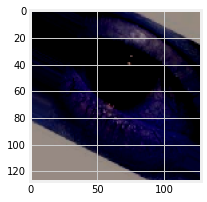

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


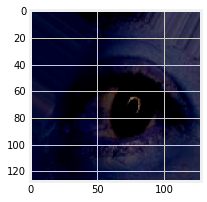

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


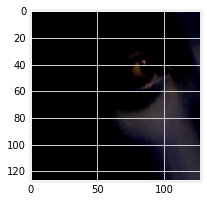

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


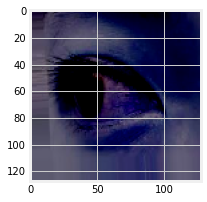

In [12]:
x_test, y_test = test_generator.__next__()

#print(y_test)
y_series_test = []
# checking/ verifying if the image and masks are coorelated
for i in range(0,11):
    image = x_test[i]
    plt.subplot(1,2,1)
    plt.imshow(image)
    y_series_test.append(int(y_test[i][1]))
    plt.show()

In [13]:
y_pred_test = resnet50_model.predict(test_generator)
y_pred_test = y_pred_test.argmax(axis=-1)
cf_matrix = confusion_matrix(y_series_test, y_pred_test)
print(cf_matrix)

1/1 [==============================] - 1s 788ms/step
[[1 4]
 [0 6]]


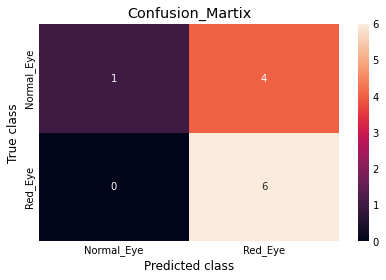

In [14]:
LABELS = ["Normal_Eye","Red_Eye"]
sns.heatmap(cf_matrix, annot=True, xticklabels=LABELS, yticklabels=LABELS,fmt = 'd')
plt.title("Confusion_Martix")
plt.ylabel("True class")
plt.xlabel("Predicted class")
plt.show()

In [15]:
pred_path = '../../data/aug_red_eye/prediction_images'
number_of_images = '../../data/aug_red_eye/prediction_images/prediction'
img_list_len = len(os.listdir(number_of_images))
batch_size = int(img_list_len)
pred_datagen = ImageDataGenerator(rescale=1./255)
pred_generator = pred_datagen.flow_from_directory(
    directory= pred_path,
    target_size=(WIDTH, HEIGHT),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode=None,
    shuffle=False,
    seed=42
)

Found 9 images belonging to 1 classes.


1/1 [==============================] - 0s 62ms/step
Red_Eye


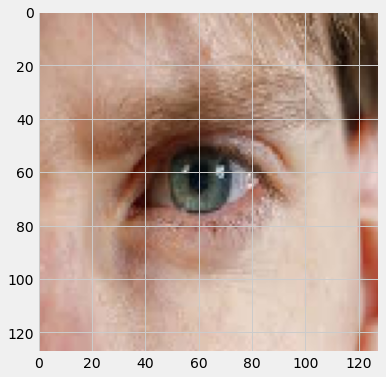

1/1 [==============================] - 0s 61ms/step
Normal_Eye


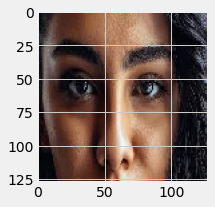

1/1 [==============================] - 0s 51ms/step
Red_Eye


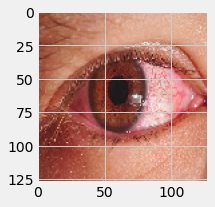

1/1 [==============================] - 0s 50ms/step
Red_Eye


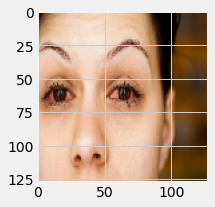

1/1 [==============================] - 0s 54ms/step
Red_Eye


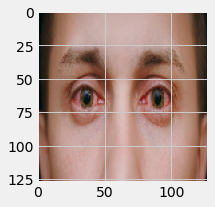

1/1 [==============================] - 0s 56ms/step
Red_Eye


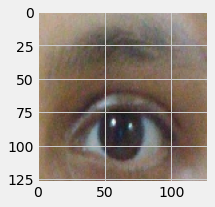

1/1 [==============================] - 0s 71ms/step
Normal_Eye


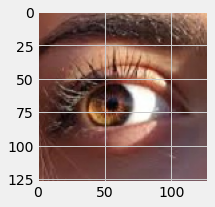

1/1 [==============================] - 0s 62ms/step
Normal_Eye


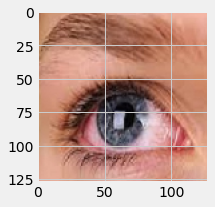

In [50]:
ncols = 3
nrows = 3

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)


x_pred = pred_generator.__next__()


# checking/ verifying if the image and masks are coorelated
for i in range(0,batch_size-1):
    image = x_pred[i]
    plt.subplot(1,2,1)
    predict=resnet50_model.predict(pred_generator)
    y_classes = predict.argmax(axis=-1)
    plt.imshow(image)
    if y_classes[i] == 0:
        print('Normal_Eye')
    else:
        print('Red_Eye')
    
    plt.show()


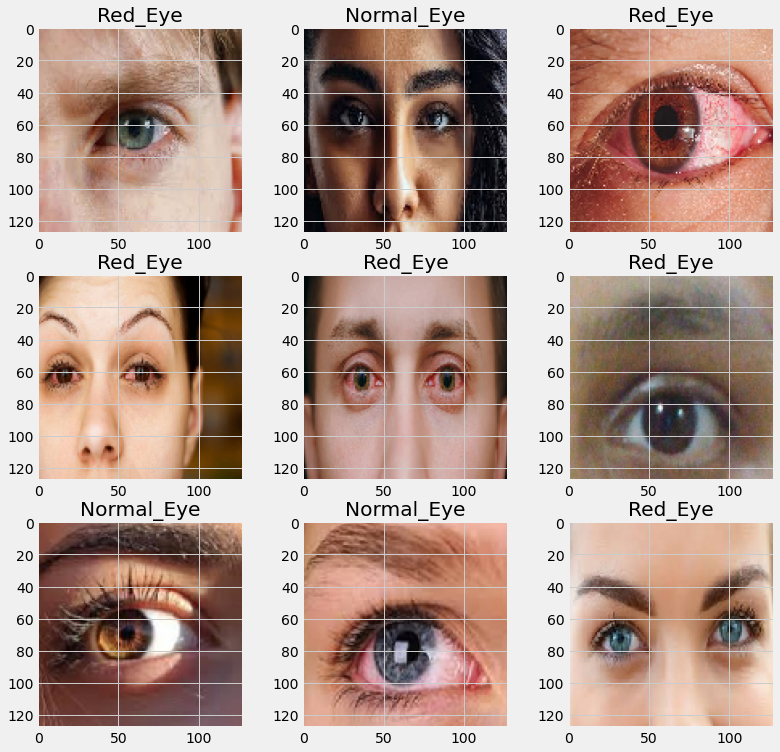

In [55]:



ncols = 3
nrows = 3

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)


x_pred = pred_generator.__next__()


# checking/ verifying if the image and masks are coorelated
# for i in range(0,batch_size-1):
#     for j in range(0,batch_size-1):
#         predict=resnet50_model.predict(pred_generator, verbose = 0)
#         y_classes = predict.argmax(axis=-1)
#         plt.imshow(image)
#         if y_classes[i] == 0:
#             label = 'Normal_Eye'
#         else:
#             label = 'Red_Eye'
            
#         ax = fig.add_subplot(ncols,nrows,i+1)
#         ax.set_title(label)
#         image = x_pred[i]
#         plt.subplot(ncols,nrows,i+1)
          
# plt.show()


# checking/ verifying if the image and masks are coorelated
for i in range(0,batch_size):
    predict=resnet50_model.predict(pred_generator, verbose = 0)
    y_classes = predict.argmax(axis=-1)
    
    if y_classes[i] == 0:
        label = 'Normal_Eye'
    else:
        label = 'Red_Eye'
    for j in range(0,batch_size):
    
        ax = fig.add_subplot(ncols,nrows,i+1)
        ax.set_title(label)
        image = x_pred[i]
        plt.subplot(ncols,nrows,i+1)
    plt.imshow(image)      
plt.show()